In [46]:
# Here the actual code from the Laser_checker is implemeted and the zones can be vizualized
import numpy as np
import matplotlib.pyplot as plt

xy_points = np.genfromtxt('Example_xy.csv', delimiter=',')

In [47]:
x = np.linspace(-5, 10, 101)
y = np.linspace(-10, 10, 101)
xx, yy = np.meshgrid(x, y)
xx_flat = xx.flatten()
yy_flat = yy.flatten()
#xy_points = np.transpose(np.array([xx_flat,yy_flat])) # Comment out to use the real points

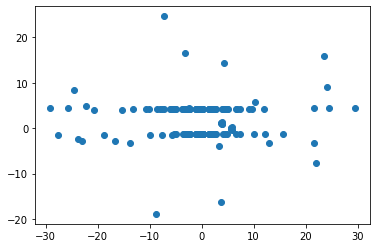

In [48]:
plt.scatter(xy_points[:,0], xy_points[:,1])

In [49]:
#FRONT
front = xy_points[xy_points[:, 0] > 0, :]
front = front[front[:, 0] < 10, :]

# plt.scatter(front[:,0], front[:,1])

In [50]:
# Paramter set
curve_radius = 25
curve = -np.pi/6;
lane_offset = 0.1
lane_width = 2

# mask calculation: comment to change mode
#mask_front = front[:, 0]*np.tan(curve) # Square mode
mask_front = (np.sqrt(np.square(curve_radius)-np.square(front[:, 0]))-curve_radius) # Curve Mode

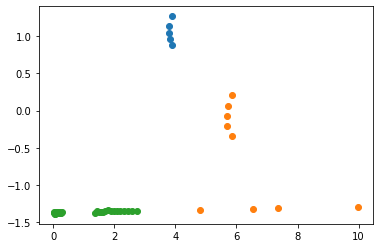

In [51]:
# FRONT LEFT (ZONE 0)
front_left = front[(mask_front+1.5*lane_width-lane_offset) >= front[:, 1], :]
mask_front_temp = mask_front[(mask_front+1.5*lane_width-lane_offset) >= front[:, 1]]
front_left = front_left[(mask_front_temp+0.5*lane_width+lane_offset) < front_left[:, 1], :]

# FRONT MIDDLE (ZONE 1)
front_middle = front[(mask_front+0.5*lane_width-lane_offset)>= front[:, 1], :]
mask_front_temp = mask_front[(mask_front+0.5*lane_width-lane_offset)>= front[:, 1]]
front_middle = front_middle[(mask_front_temp-0.5*lane_width+lane_offset) <= front_middle[:, 1]]

# FRONT RIGHT (ZONE 2)
front_right = front[(mask_front-0.5*lane_width-lane_offset) > front[:, 1], :]
mask_front_temp = mask_front[(mask_front-0.5*lane_width-lane_offset) > front[:, 1]]
front_right = front_right[(mask_front_temp-1.5*lane_width+lane_offset) <= front_right[:, 1], :]

plt.scatter(front_left[:,0], front_left[:,1])
plt.scatter(front_middle[:,0], front_middle[:,1])
plt.scatter(front_right[:,0], front_right[:,1])
plt.show()

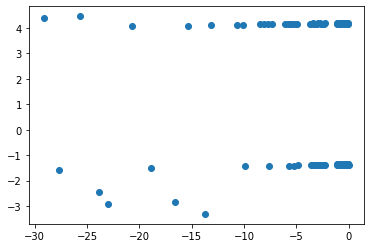

In [52]:
# Viz of the BACK AND SIDE
back_side = xy_points[xy_points[:, 0] <= 0, :]

back_side = back_side[np.abs(back_side[:, 1]) <= 4.5,:]
plt.scatter(back_side[:,0], back_side[:,1])
plt.show()

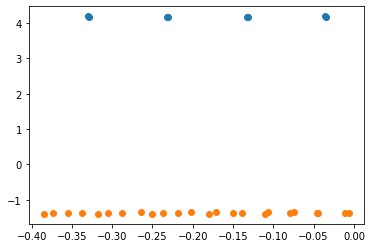

In [53]:
# Viz of the SIDE
side = back_side[back_side[:, 0] >= -0.4, :]

side_left = side[side[:, 1] > 0, :]
side_right = side[side[:, 1] < 0, :]  # CHECK AGAIN
plt.scatter(side_left[:,0], side_left[:,1])
plt.scatter(side_right[:,0], side_right[:,1])
plt.show()

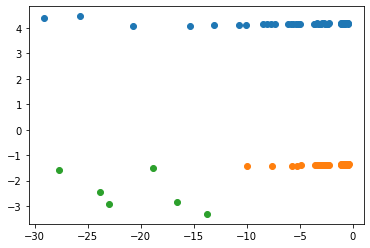

In [54]:
# Viz of the BACK
back = back_side[back_side[:, 0] < -0.4, :]

back_left = back[back[:, 1] > 0.5*3, :]

back_middle = back[back[:, 1] <= 0.5*3, :]
back_middle = back_middle[back_middle[:, 1] >= -0.5*3, :]

back_right = back[back[:, 1] < -0.5*3, :]

plt.scatter(back_left[:,0], back_left[:,1])
plt.scatter(back_middle[:,0], back_middle[:,1])
plt.scatter(back_right[:,0], back_right[:,1])
plt.show()